In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('titanic_toy.csv')
df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [4]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [8]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [13]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age variance after 99 value imputation: ', X_train['Age_99'].var())
print('Age variance after -1 value imputation: ', X_train['Age_minus1'].var())
print()
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare variance after 999 value imputation: ', X_train['Fare_999'].var())
print('Fare variance after -1 value imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  210.2517072477438
Age variance after 99 value imputation:  932.9665366701436
Age variance after -1 value imputation:  315.99550362600644

Original Fare variable variance:  2761.031434948639
Fare variance after 999 value imputation:  47525.47059536007
Fare variance after -1 value imputation:  2675.2394049177087


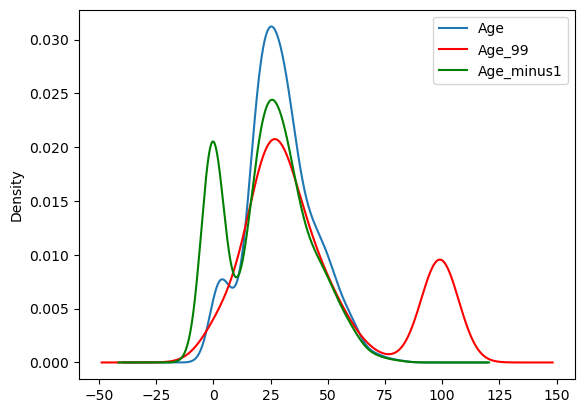

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde', ax=ax)

X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

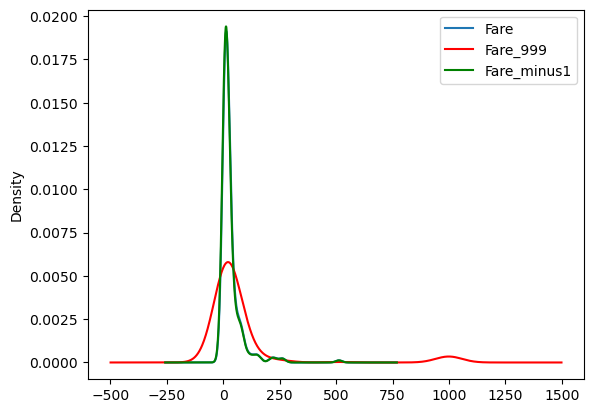

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde', ax=ax)

X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [17]:
X_train.cov()

Age         Fare     Family      Age_99  Age_minus1  \
Age          210.251707    75.481375  -6.993325  210.251707  210.251707   
Fare          75.481375  2761.031435  18.599163 -111.965046  135.785804   
Family        -6.993325    18.599163   2.830892   -6.941982   -5.034556   
Age_99       210.251707  -111.965046  -6.941982  932.966537 -166.460682   
Age_minus1   210.251707   135.785804  -5.034556 -166.460682  315.995504   
Fare_999     130.495777  2761.031435  16.878492 -255.051165  262.712284   
Fare_minus1   69.137162  2761.031435  17.684447 -101.137070  124.270305   

                 Fare_999  Fare_minus1  
Age            130.495777    69.137162  
Fare          2761.031435  2761.031435  
Family          16.878492    17.684447  
Age_99        -255.051165  -101.137070  
Age_minus1     262.712284   124.270305  
Fare_999     47525.470595  1063.944817  
Fare_minus1   1063.944817  2675.239405

In [18]:
X_train.corr()

Age      Fare    Family    Age_99  Age_minus1  Fare_999  \
Age          1.000000  0.091482 -0.319651  1.000000    1.000000  0.039967   
Fare         0.091482  1.000000  0.207193 -0.069365    0.145071  1.000000   
Family      -0.319651  0.207193  1.000000 -0.135079   -0.168329  0.046016   
Age_99       1.000000 -0.069365 -0.135079  1.000000   -0.306576 -0.038303   
Age_minus1   1.000000  0.145071 -0.168329 -0.306576    1.000000  0.067792   
Fare_999     0.039967  1.000000  0.046016 -0.038303    0.067792  1.000000   
Fare_minus1  0.085422  1.000000  0.203212 -0.064017    0.135159  0.094357   

             Fare_minus1  
Age             0.085422  
Fare            1.000000  
Family          0.203212  
Age_99         -0.064017  
Age_minus1      0.135159  
Fare_999        0.094357  
Fare_minus1     1.000000

# Using Sklean

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
])

In [21]:
trf.fit(X_train)

ColumnTransformer(transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [22]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [23]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [24]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [26]:
X_train

array([[ 45.5   ,  28.5   ],
       [ 23.    ,  13.    ],
       [ 32.    ,   7.925 ],
       ...,
       [ 41.    , 999.    ],
       [ 14.    , 120.    ],
       [ 21.    ,  77.2875]])